Problem 1

Text(0, 0.5, 'p(y)')

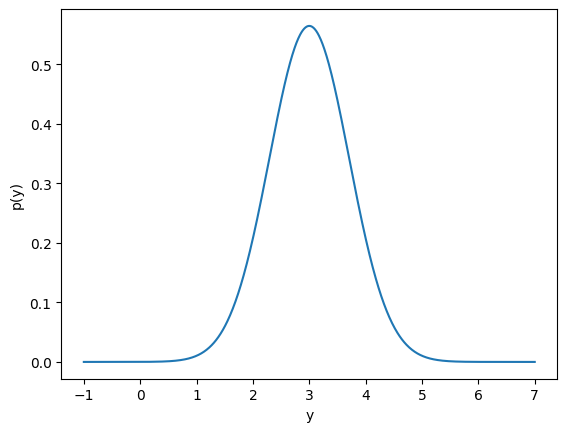

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normal_distribution(x, mean, variance):
    return 1/np.sqrt(2*np.pi*variance) * np.exp(-(x-mean)**2/(2*variance))

y = np.linspace(-1, 7, 1000)
pdf = lambda y: normal_distribution(y, 3, 0.5)

plt.plot(y, pdf(y))
plt.xlabel("y")
plt.ylabel("p(y)")

In [2]:
def calculate_probability(pdf, lower_bound, upper_bound, step=1e-4):
    x = np.arange(lower_bound, upper_bound, step)
    y = pdf(x)
    return (np.cumsum(y)*step)[-1]

step = 1e-7
print(f"Pr(y<3): {calculate_probability(pdf, lower_bound=-20, upper_bound=3-step, step=step)}")
print(f"Pr(y>=5): {calculate_probability(pdf, lower_bound=5, upper_bound=20, step=step)}")
print(f"Pr(3<=y<5): {calculate_probability(pdf, lower_bound=3, upper_bound=5-step, step=step)}")

Pr(y<3): 0.5000000611716313
Pr(y>=5): 0.00233886800052003
Pr(3<=y<5): 0.49766115994986376


Problem 2

In [3]:
pdf1 = lambda y: normal_distribution(y, 1, 2)
pdf2 = lambda y: normal_distribution(y, 0, 0.5)

pr1 = calculate_probability(pdf1, lower_bound=-100, upper_bound=2, step=1e-5)
pr2 = calculate_probability(pdf2, lower_bound=-100, upper_bound=0.5, step=1e-5)
print(pr1*pr2)

0.577977479949121


In [4]:
pdf1 = lambda y: normal_distribution(y, 1, 2)
pdf2 = lambda y: normal_distribution(y, 0, 0.5)

pr1 = calculate_probability(pdf1, lower_bound=1, upper_bound=2, step=1e-4)
pr2 = calculate_probability(pdf2, lower_bound=0, upper_bound=0.5, step=1e-4)
print(pr1*pr2)

0.06773246650733125


Text(0, 0.5, 'p(y)')

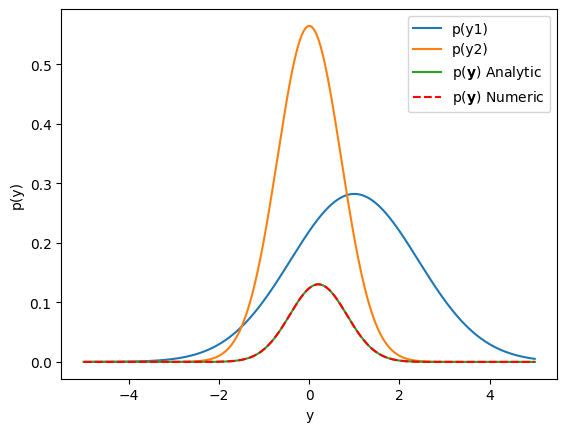

In [5]:

def pdf_analytic(x):
    return np.exp(-1/5)/(2*np.pi)*np.exp(-(x-1/5)**2 / (2 * np.sqrt(2/5)**2))

pdf = lambda y: pdf1(y)*pdf2(y)

y = np.linspace(-5, 5, 1000)
plt.plot(y, pdf1(y), label="p(y1)")
plt.plot(y, pdf2(y), label="p(y2)")
plt.plot(y, pdf_analytic(y), label=r"p($\bf{y}$) Analytic")
plt.plot(y, pdf(y), "r--", label=r"p($\bf{y}$) Numeric")
plt.legend()
plt.xlabel("y")
plt.ylabel("p(y)")

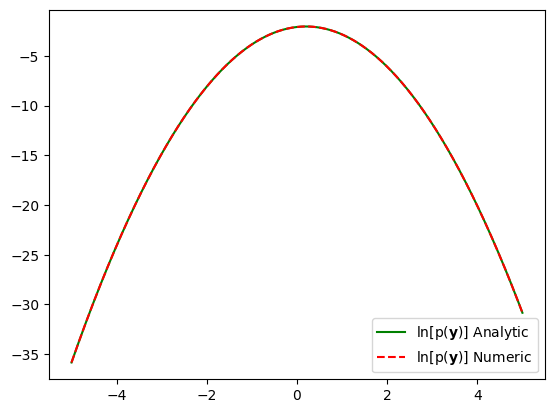

In [6]:
def ln_p_analytic(x):
    return -1/5 - np.log(2*np.pi) -5/4*(x-1/5)**2
def ln_p_analytic(x):
    return -5/4 * x**2 + 1/2 * x - 5/20 - np.log(2*np.pi)

plt.plot(y, ln_p_analytic(y), "g-", label=r"ln[p($\bf{y}$)] Analytic")
plt.plot(y, np.log(pdf(y)), "r--", label=r"ln[p($\bf{y}$)] Numeric")
plt.legend()

# Problem 4

[33.53135225  0.09020712 -0.10312645]


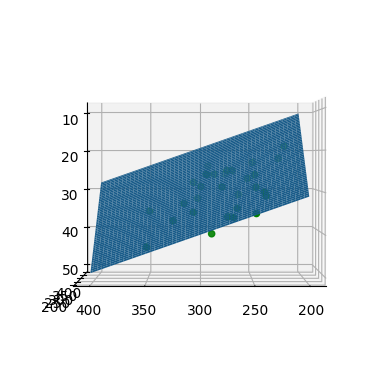

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([
    [289,229],
    [315,270],
    [302,312],
    [274,294],
    [292,351],
    [269,215],
    [306,246],
    [248,209],
    [248,272],
    [249,318],
    [274,232],
    [279,275],
    [254,303],
    [294,321],
    [224,312],
    [348,288],
    [263,304],
    [306,311],
    [286,308],
    [293,301],
    [265,240],
    [240,229],
    [238,240],
    [247,264],
    [219,298],
    [349,213],
    [325,241],
    [299,297],
    [275,353],
    [269,295],
])

y_data = np.array([
    40,
    33,
    32,
    25,
    24,
    36,
    35,
    35,
    26,
    23,
    36,
    29,
    27,
    26,
    22,
    35,
    31,
    28,
    26,
    26,
    34,
    30,
    31,
    29,
    19,
    43,
    37,
    29,
    26,
    25,
])

def calculate_X(x_data, y_data):
    if len(x_data.shape) < 2:
        x_data = np.atleast_2d(x_data).reshape((x_data.shape[0], 1))
    n=y_data.shape[0]
    p=x_data.shape[1]
    X = np.zeros((n, p+1), dtype=float)
    
    for i in range(n):
        X[i, :] = np.array([1] + list(x_data[i]))
    return X

def calculate_theta_hat(x_data, y_data):
    X = calculate_X(x_data, y_data)
    return np.linalg.pinv(X)@y_data

def calculate_y_hat(x, theta):
    x = np.array(x)
    if len(x.shape) < 2:
        x = np.atleast_2d(x).reshape((x.shape[0], 1))
    m = x.shape[0]
    y_hat = np.zeros((m,), dtype=float)
    for i in range(m):
        y_hat[i] = theta[0] + np.dot(theta[1:], x[i])
    return y_hat


theta_hat1 = calculate_theta_hat(x_data, y_data)
print(theta_hat1)

predict = lambda x1, x2: calculate_y_hat([[x1, x2]], theta_hat1)

@np.vectorize
def calculate_z(x1, x2):
    return predict(x1, x2)[0]


fig = plt.figure()
ax = plt.axes(projection='3d')
y_hat = calculate_y_hat(x_data, theta_hat1)

# ax.scatter(x_data[:, 0], x_data[:, 0], y_data)


x = np.linspace(200, 400, 100)
y = np.linspace(200, 400, 100)
X, Y = np.meshgrid(x, y)
Z = calculate_z(X, Y)

ax.plot_surface(X, Y, Z)
ax.scatter(x_data[:,0], x_data[:,1], y_data, color="g")
# ax.scatter(X.ravel(),Y.ravel(), Z.ravel())

# plt.scatter(x_data[:, 0], x_data[:, 0], y_hat)
ax.view_init(-179, 90)
plt.show()


[29.93986391  0.09795866]


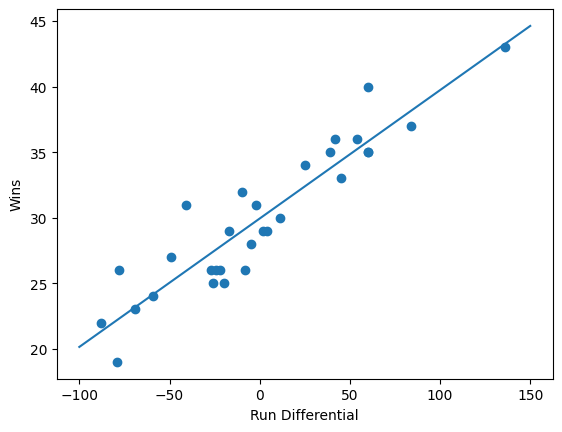

In [8]:
run_diff = x_data[:, 0] - x_data[:, 1]

theta_hat2 = calculate_theta_hat(run_diff, y_data)

x = np.linspace(-100, 150, 1000)
y_hat = calculate_y_hat(x, theta_hat2)

plt.plot(x, y_hat)
plt.scatter(run_diff, y_data)

plt.xlabel("Run Differential")
plt.ylabel("Wins")

print(theta_hat2)

In [9]:
theta_hat1

array([33.53135225,  0.09020712, -0.10312645])

In [10]:
theta_hat2

array([29.93986391,  0.09795866])

In [14]:
print("Model 1: ", calculate_y_hat([[212, 176]], theta_hat1))
print("Model 2: ", calculate_y_hat([[212-176]], theta_hat2))

Model 1:  [34.50500599]
Model 2:  [33.46637556]
